In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

In [8]:
data =pd.read_csv(r'C:\Users\harsh\OneDrive\Desktop\drug200.csv')

In [9]:
data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [12]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [13]:
data.groupby('BP').value_counts()

BP      Age  Sex  Cholesterol  Na_to_K  Drug 
HIGH    15   F    NORMAL       16.725   drugY    1
             M    NORMAL       17.206   drugY    1
        31   M    NORMAL       17.069   drugY    1
        32   F    NORMAL       25.974   drugY    1
             M    NORMAL       9.445    drugA    1
                                                ..
NORMAL  47   F    NORMAL       6.683    drugX    1
        49   F    HIGH         16.275   drugY    1
                  NORMAL       9.381    drugX    1
        50   F    HIGH         12.703   drugX    1
        73   F    HIGH         19.221   drugY    1
Length: 200, dtype: int64

In [21]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x



,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [22]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [25]:
#machine learning __ converting the data into binary fromat to make it understandable by the compiler
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in x.columns:
    if x[i].dtype == "object":
        x[i]=le.fit_transform(x[i])

In [26]:
print(x)

     Age  Sex  BP  Cholesterol  Na_to_K
0     23    0   0            0   25.355
1     47    1   1            0   13.093
2     47    1   1            0   10.114
3     28    0   2            0    7.798
4     61    0   1            0   18.043
..   ...  ...  ..          ...      ...
195   56    0   1            0   11.567
196   16    1   1            0   12.006
197   52    1   2            0    9.894
198   23    1   2            1   14.020
199   40    0   1            1   11.349

[200 rows x 5 columns]


In [34]:
counts= x['Cholesterol'].value_counts()

In [35]:
counts

0    103
1     97
Name: Cholesterol, dtype: int64

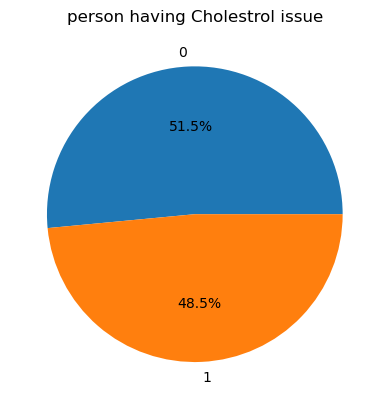

In [38]:
plt.pie(counts,labels=counts.index,autopct="%1.1f%%")
plt.title("person having Cholestrol issue")
plt.show()

In [39]:
#split the data into trained sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.30,random_state=99)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(140, 5) (60, 5) (140,) (60,)


In [1]:
#ML Algo for creating decision tree
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier()



In [2]:
dt = dt.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [ ]:
y_pred=dt.predict(x_test)

In [43]:
y_pred

array(['drugX', 'drugX', 'drugA', 'drugA', 'drugY', 'drugX', 'drugX',
       'drugA', 'drugY', 'drugA', 'drugB', 'drugY', 'drugC', 'drugY',
       'drugY', 'drugC', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX',
       'drugA', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugA', 'drugY', 'drugX', 'drugX', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugA', 'drugX', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugA', 'drugY', 'drugB', 'drugY',
       'drugY', 'drugC', 'drugY', 'drugY', 'drugA', 'drugB', 'drugA',
       'drugX', 'drugC', 'drugY', 'drugX'], dtype=object)

In [44]:
#accuracy score
from sklearn.metrics import *
accuracy_score(y_test,y_pred)


0.9833333333333333

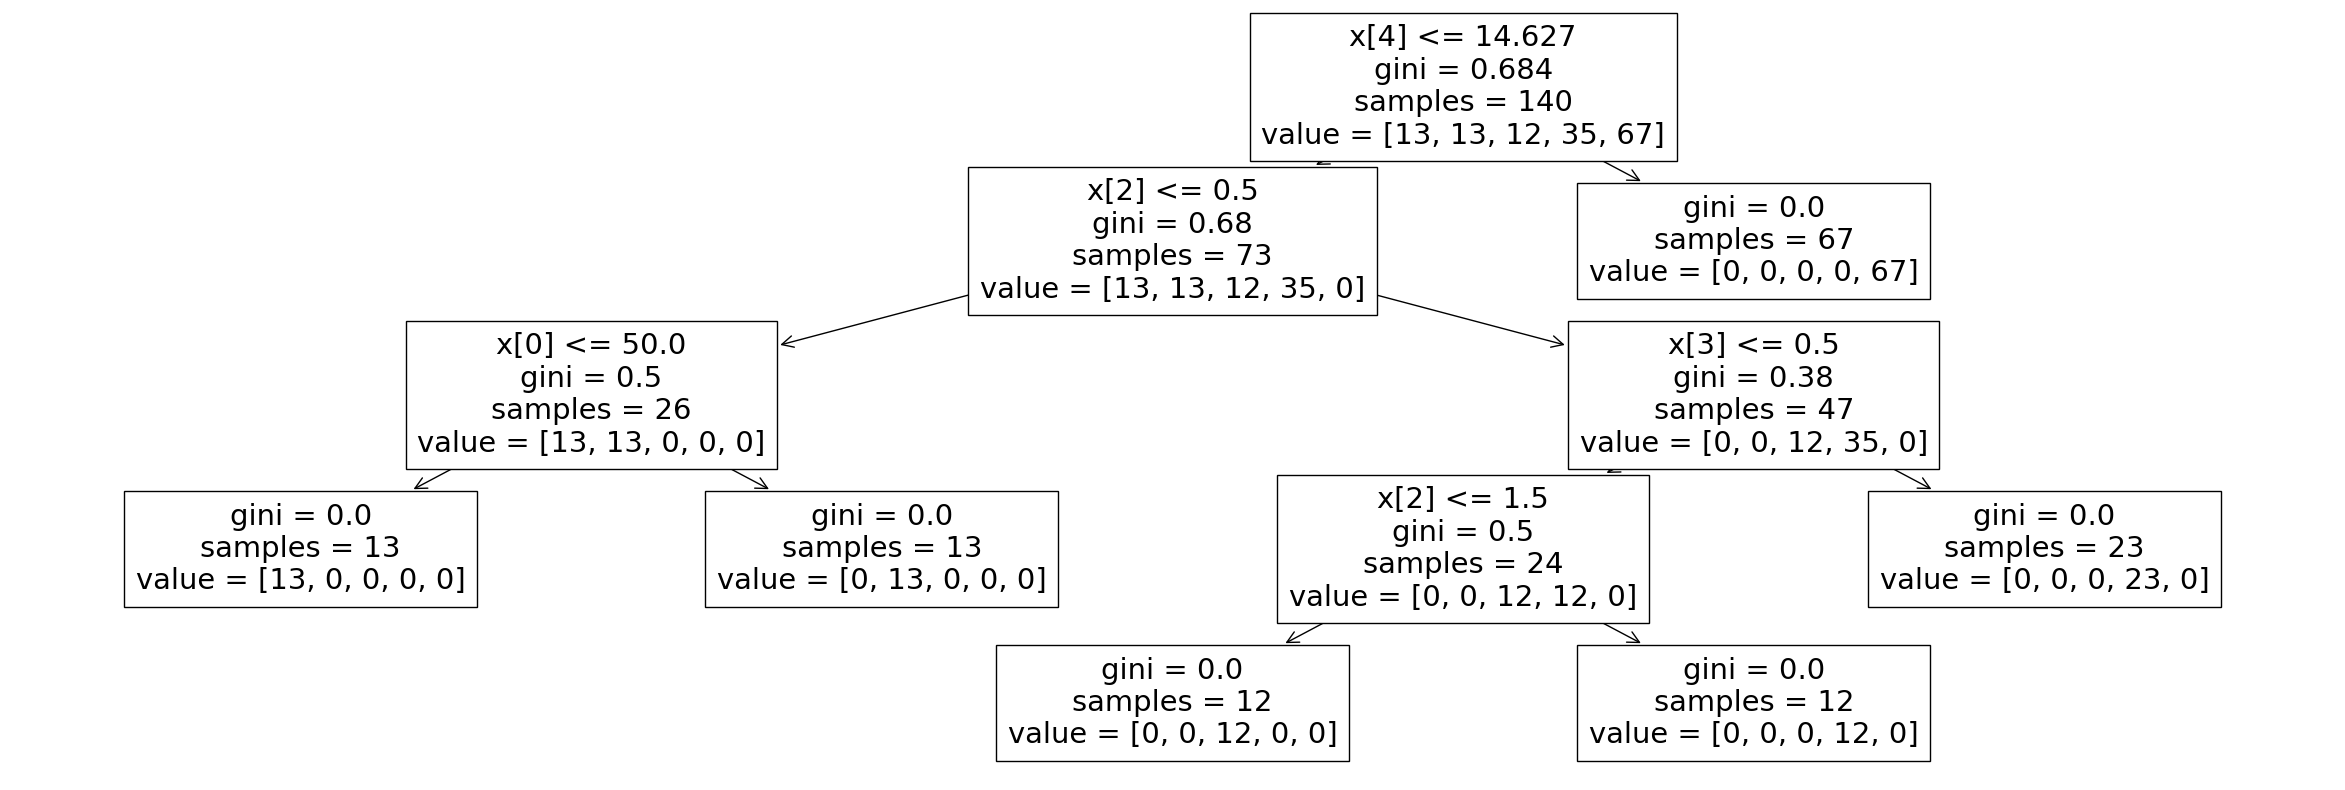

<Figure size 640x480 with 0 Axes>

In [45]:
#Plotting the decision tree
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(dt)
plt.show()
plt.savefig("decision_tree.png")